In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_csv("cars.csv")

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
#removing Car_ID as it holds no significance
df.drop("Car_ID",axis=1,inplace=True)

### Data Understanding
**How many rows and columns does the dataset contain?**

In [5]:
df.shape

(100, 12)

**What are the data types of each feature? Which ones are categorical and which ones are numerical?**

In [6]:
df.dtypes

Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

object data type columns: 
- Brand
- Model
- Fuel_Type
- Transmission
- Owner_Type

int64 data type columns:
- Year
- Kilometers_Driven
- Mileage
- Engine
- Engine
- Seats
- Price


**Are there any missing values? If yes, in which columns and how many?**

In [7]:
df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

There is not any missing value in the dataset.

### Target Variable (Price) Exploration
**What is the distribution of car prices (mean, median, min, max, skewness)?**

In [8]:
print("Mean Price:",df["Price"].mean())
print("Median Price:",df["Price"].median())
print("Min Price:",df["Price"].min())
print("Max Price:",df["Price"].max())
print("Skewness of Price:",df["Price"].skew())

Mean Price: 1574000.0
Median Price: 1300000.0
Min Price: 450000
Max Price: 4000000
Skewness of Price: 0.6142859340595381


**Plot the histogram of Price. Does it look normally distributed or skewed?**

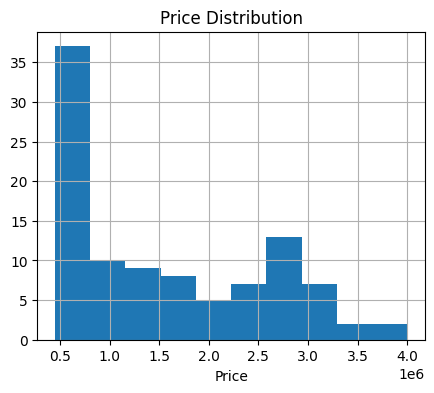

In [9]:
plt.figure(figsize=(5,4))
df['Price'].hist()
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

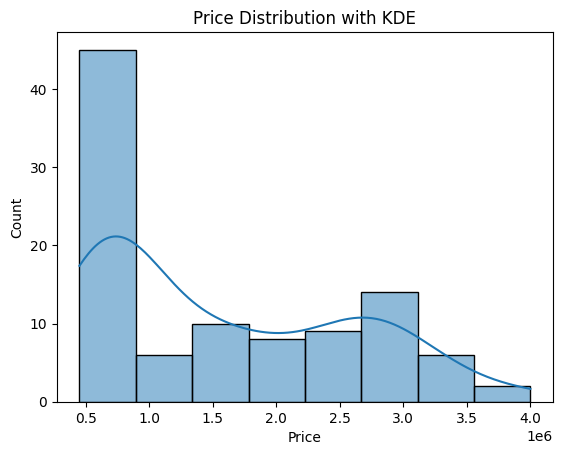

In [10]:
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution with KDE')
plt.xlabel('Price')
plt.show()

Data does not follows a Normal distribution, rather it is a bimodal and right skewed

**Identify potential outliers in Price. What could be the reason for these extreme values?**

<Axes: >

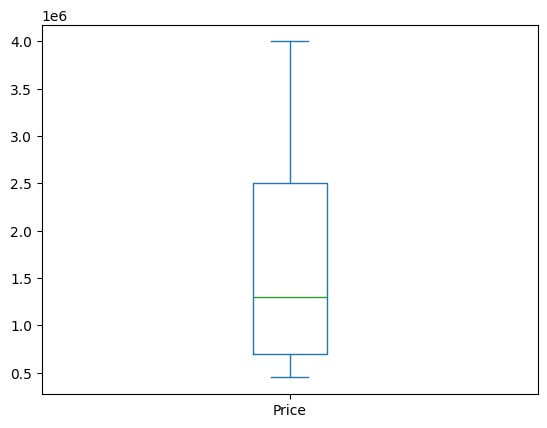

In [11]:
df['Price'].plot.box()

cant see a outlier in the boxplot

In [12]:
# trying to find outliers using IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Number of outliers in Price:", outliers.shape[0])

Number of outliers in Price: 0


In [13]:
# trying with z-score
z_values = (df['Price'] - df['Price'].mean()) / df['Price'].std()
outliers_z = df[np.abs(z_values) > 3]
print("Number of outliers in Price using Z-score:", outliers_z.shape[0])

Number of outliers in Price using Z-score: 0


### Categorical Feature Analysis
**Which Fuel_Type is most common in the dataset?**

In [14]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

The most common Fuel_Type is `Petrol`

**How does the average Price vary across Fuel_Type (Petrol vs Diesel vs CNG)?**

In [15]:
grp_by_fuel = df[['Fuel_Type','Price']].groupby('Fuel_Type').mean()
grp_by_fuel

,Price
Fuel_Type,
Diesel,1.761458e+06
Petrol,1.400962e+06


In [16]:
avg_price_petrol = grp_by_fuel.loc['Petrol']['Price']
avg_price_diesel = grp_by_fuel.loc['Diesel']['Price']

In [17]:
(avg_price_diesel - avg_price_petrol)/ avg_price_diesel * 100

np.float64(20.465814493017326)

On an average, petrol car prices are **20-21%** cheaper than diesel cars 

**Does Transmission (Manual vs Automatic) affect car prices significantly? Use a boxplot.**

Text(0.5, 1.0, 'Price Distribution by Transmission Type')

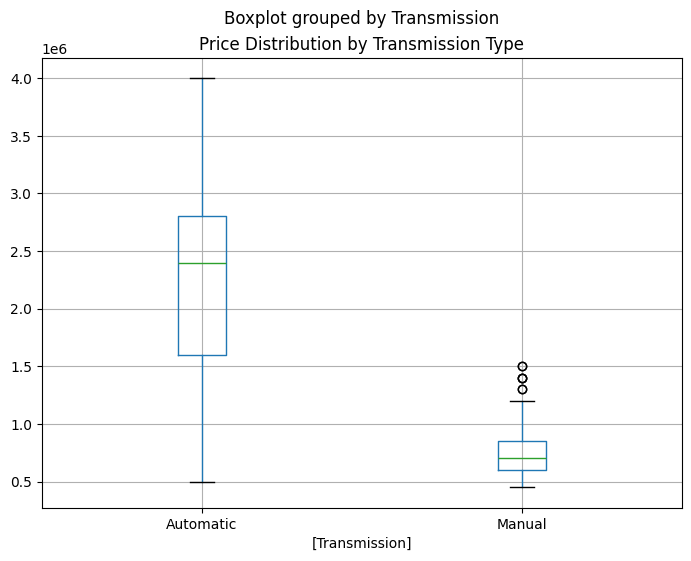

In [18]:
df[['Transmission','Price']].boxplot(by='Transmission', figsize=(8,6))
plt.title('Price Distribution by Transmission Type')

In [19]:
avg_price_Automatic = df['Price'][df['Transmission'] == 'Automatic'].mean()
avg_price_Manual = df['Price'][df['Transmission'] == 'Manual'].mean()

In [20]:
avg_price_Automatic,avg_price_Manual

(np.float64(2158771.9298245613), np.float64(798837.2093023256))

In [21]:
(avg_price_Automatic - avg_price_Manual)/ avg_price_Automatic * 100

np.float64(62.995757066044234)

The price bracket will increase by **63%** when a user chooses automatic transmission over manual.

**Which Seller_Type (Dealer vs Individual) generally sells cars at higher prices?**

In [22]:
df[['Seller_Type','Price']].boxplot(by='Seller_Type', figsize=(8,6))

KeyError: "['Seller_Type'] not in index"

In [ ]:
df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


### Numerical Feature Analysis
**What is the average mileage (Kms_Driven) of the cars? Is it normally distributed or skewed?**

In [ ]:
print("The average Kilometers Driven is:", df['Kilometers_Driven'].mean())

The average Kilometers Driven is: 28150.0


<Axes: xlabel='Kilometers_Driven', ylabel='Count'>

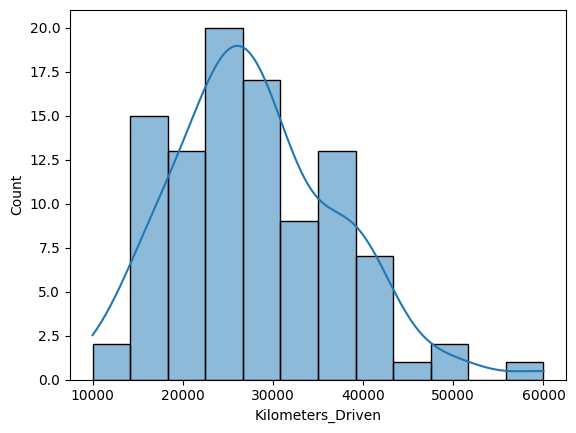

In [ ]:
sns.histplot(df['Kilometers_Driven'], kde=True)

In [ ]:
df['Kilometers_Driven'].skew()

np.float64(0.621260913755414)

since skewness is a little more than 0, so we can say data is slightly rightskewed 

**Does higher mileage (Kms_Driven) always lead to a lower price? Check using a scatter plot.**

Text(0, 0.5, 'Price')

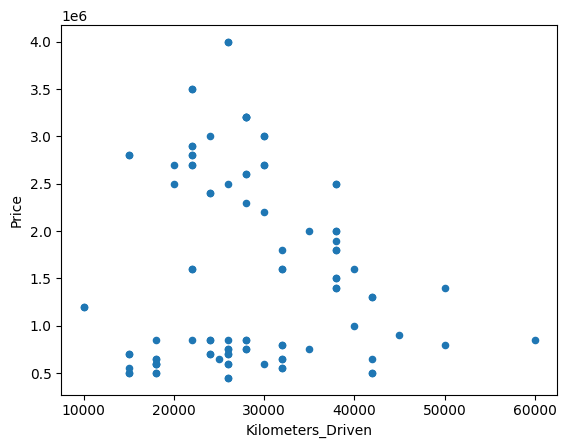

In [ ]:
df.plot.scatter('Kilometers_Driven','Price')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')

<Axes: >

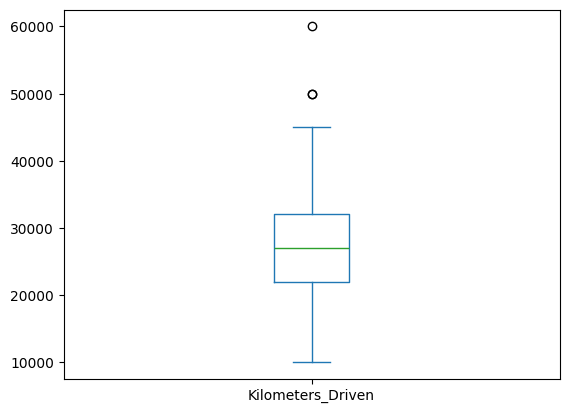

In [ ]:
df['Kilometers_Driven'].plot.box()

<Axes: >

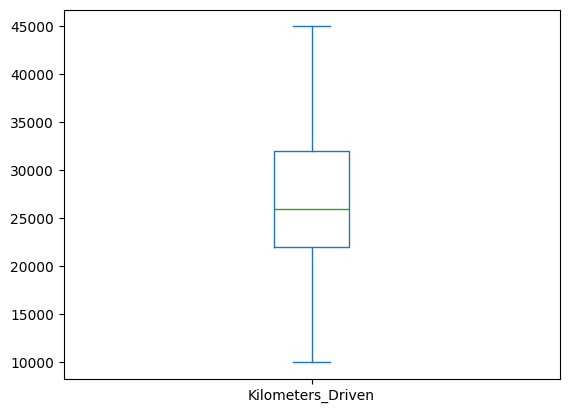

In [ ]:
# removing outliers in Kilometers_Driven
Q1_km = df['Kilometers_Driven'].quantile(0.25)
Q3_km = df['Kilometers_Driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km
cleaned_df = df[~((df['Kilometers_Driven'] < lower_bound_km) | (df['Kilometers_Driven'] > upper_bound_km))].copy()
cleaned_df['Kilometers_Driven'].plot.box()

In [ ]:
cleaned_df['Kilometers_Driven'].max()

np.int64(45000)

In [ ]:
cleaned_df['Kilometers_Driven'].min()

np.int64(10000)

In [ ]:
kil_rng = np.linspace(cleaned_df['Kilometers_Driven'].min(),cleaned_df['Kilometers_Driven'].max()+1,6,dtype=int)

In [ ]:
avg_prices = []
for lower, upper in zip(kil_rng[:-1],kil_rng[1:]):
    avg_price = cleaned_df['Price'][(cleaned_df['Kilometers_Driven'] >= lower) & (cleaned_df['Kilometers_Driven'] < upper)].mean()
    avg_prices.append(avg_price)

Text(0.5, 1.0, 'Average Price vs Kilometers Driven Range')

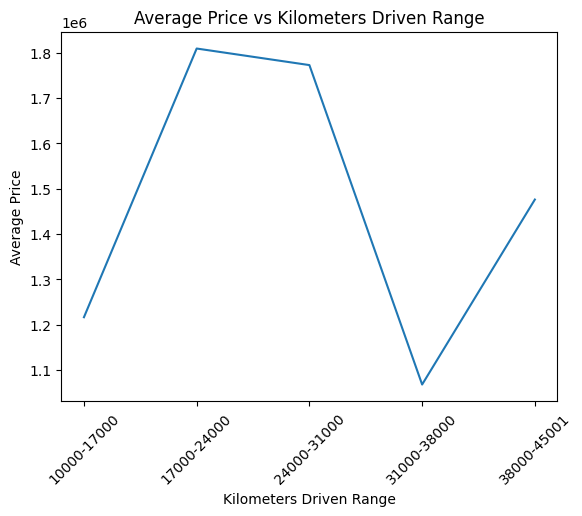

In [ ]:
plt.plot([f"{lower}-{upper}" for lower, upper in zip(kil_rng[:-1],kil_rng[1:])], avg_prices)
plt.xticks(rotation=45)
plt.xlabel('Kilometers Driven Range')
plt.ylabel('Average Price')
plt.title('Average Price vs Kilometers Driven Range')

In [ ]:
df['Kilometers_Driven'].corr(df['Price'])

np.float64(-0.051104054365389416)

It is not clear if higher mileage lead to lower price

**Create a new feature Car_Age = CurrentYear - Year. How does Car_Age correlate with Price?**

In [ ]:
from datetime import date
dt = date.today().year

In [ ]:
df['Car_Age'] = dt - df['Year']

In [ ]:
df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,7
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,6
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,8
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,5
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,9


In [ ]:
df['Car_Age'].corr(df['Price'])

np.float64(0.2326870000676158)

**Which year’s cars dominate the dataset?**

In [ ]:
df['Year'].value_counts()

Year
2018    28
2019    28
2017    21
2020    17
2016     4
2021     2
Name: count, dtype: int64

<Axes: xlabel='Year'>

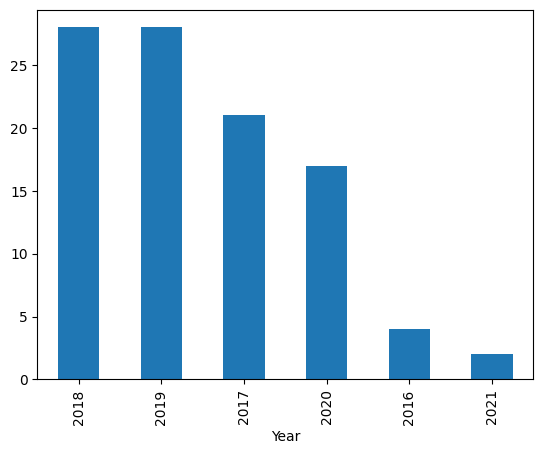

In [ ]:
df['Year'].value_counts().plot.bar()

Our dataset contains more in the year 2018, 2019 

### Multivariate Analysis
**Plot a heatmap of correlations among numerical features. Which features are most strongly correlated with Price?**

In [ ]:
df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,7
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,6
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,8
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,5
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,9


<Axes: >

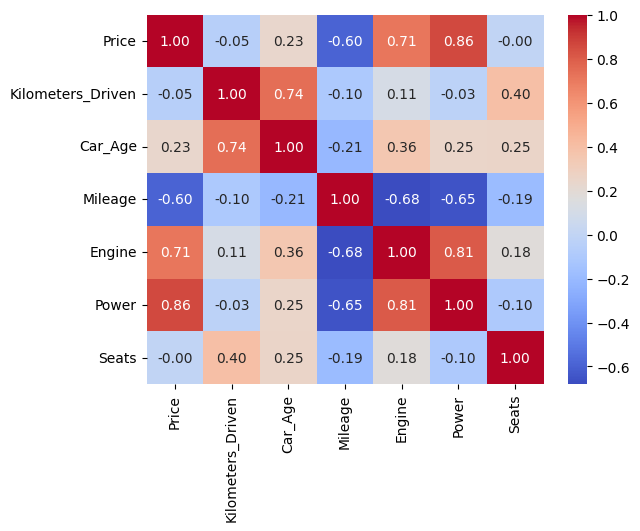

In [ ]:
cont_vars = ['Price', 'Kilometers_Driven', 'Car_Age', 'Mileage', 'Engine', 'Power', 'Seats']
sns.heatmap(df[cont_vars].corr(), annot=True, cmap='coolwarm',fmt=".2f")

Price is highly correlated to `"Power", "Engine" and "Mileage"` features

**Compare Price vs Car_Age across different Fuel_Type. Do Diesel cars retain value better than Petrol?**

In [ ]:
tmp_df = df[['Fuel_Type','Car_Age','Price']].groupby(['Fuel_Type','Car_Age']).mean()
tmp_df

Price
Fuel_Type Car_Age              
Diesel    4        1.200000e+06
          5        6.000000e+05
          6        2.396154e+06
          7        1.418750e+06
          8        1.790000e+06
          9        8.500000e+05
Petrol    5        8.843750e+05
          6        1.093333e+06
          7        2.208333e+06
          8        1.716667e+06
          9        1.833333e+06

In [ ]:
tmp_df.unstack('Fuel_Type')

Price              
Fuel_Type        Diesel        Petrol
Car_Age                              
4          1.200000e+06           NaN
5          6.000000e+05  8.843750e+05
6          2.396154e+06  1.093333e+06
7          1.418750e+06  2.208333e+06
8          1.790000e+06  1.716667e+06
9          8.500000e+05  1.833333e+06

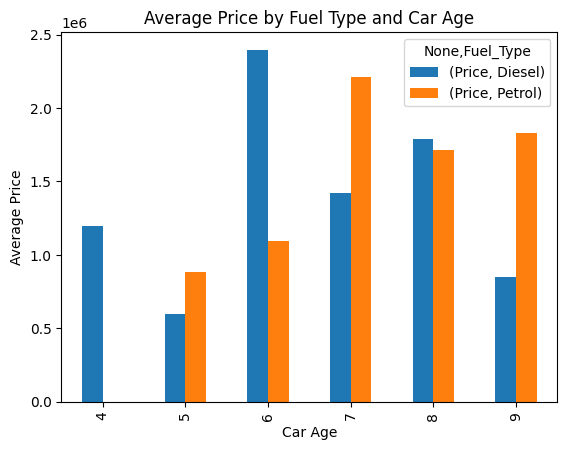

In [ ]:
tmp_df.unstack('Fuel_Type').plot.bar()
plt.title('Average Price by Fuel Type and Car Age')
plt.xlabel('Car Age')
plt.ylabel('Average Price')
plt.show()

Its unclear 

In [ ]:
df

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,7
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,6
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,8
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,5
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000,6
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000,8
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000,7
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000,6


**Do automatic cars (Transmission=Automatic) depreciate faster or slower compared to manual ones?**

**Does ownership type (e.g., First owner vs Second owner) have a clear effect on price?**

# SLR

In [ ]:
df

NameError: name 'df' is not defined